# Задание 1

В первом задании требуется сделать базовый EDA (exploratory data analysis). Найдите зависимости в показателях, посмотрите на распределения этих показателей и сделайте соответствующие выводы.
Рекомендации подскажут вам с чего можно начать.

* Постройте графики распределений показателей.
* Посчитайте статистики, которые вы знаете.
* Поищите зависимости между данными и подумайте о способах, которыми можно поискать эти зависимости.

В var4 представлены данные турнира по стрельбе из лука среди женщин: очки в разных частях турнира, размер наконечника стрел, страна.

## Импорт данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import skew

import warnings

sns.set(style="whitegrid", font="serif", font_scale=1.1)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('var4.tsv', sep='\t')
df

,Archer(Women),Total score (1),1st Half,2nd Half,Xs,Total score (2)
0,Park Sung-Hyun (KOR),673,336,337,12,679
1,Yun Ok-Hee (KOR),667,336,331,14,660
2,Joo Hyun-Jung (KOR),664,339,325,10,649
3,Khatuna Narimanidze (GEO),663,330,333,12,678
4,Kwon Un Sil (PRK),656,324,332,9,660
...,...,...,...,...,...,...
59,Najmeh Abtin (IRI),568,278,290,6,604
60,Dorji Dema (BHU),567,283,284,2,661
61,Sigrid Romero (COL),551,279,272,1,649
62,Albina Kamaletdinova (TJK),547,294,253,7,563


## Графики распределения показателей

## Total score (1)

In [3]:
xs = df['Total score (1)']
print('Mean:', np.mean(xs))
print('Median:', np.median(xs))
print('Standart deviation:', np.std(xs))
print('Skewness:', skew(xs))

Mean: 624.40625
Median: 630.5
Standart deviation: 28.29792326191977
Skewness: -1.1238955801444677


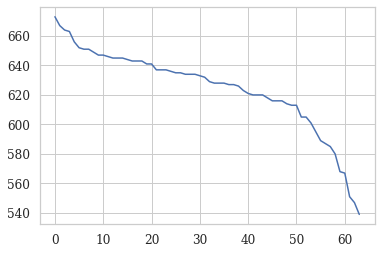

In [4]:
plt.plot(xs)
plt.show()

## Total score (2)

In [5]:
xs = df['Total score (2)']
print('Mean:', np.mean(xs))
print('Median:', np.median(xs))
print('Standart deviation:', np.std(xs))
print('Skewness:', skew(xs))

Mean: 651.09375
Median: 657.5
Standart deviation: 20.826454593557205
Skewness: -1.677640460640804


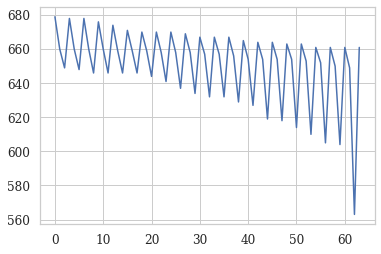

In [6]:
plt.plot(xs)
plt.show()


## 1st Halt

In [7]:
xs = df['1st Half']
print('Mean:', np.mean(xs))
print('Median:', np.median(xs))
print('Standart deviation:', np.std(xs))
print('Skewness:', skew(xs))

Mean: 313.53125
Median: 317.5
Standart deviation: 14.785940059309722
Skewness: -0.9070749414333177


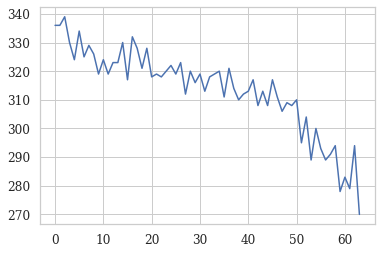

In [8]:
plt.plot(xs)
plt.show()

## 2nd Halt

In [9]:
xs = df['1st Half']
print('Mean:', np.mean(xs))
print('Median:', np.median(xs))
print('Standart deviation:', np.std(xs))
print('Skewness:', skew(xs))

Mean: 313.53125
Median: 317.5
Standart deviation: 14.785940059309722
Skewness: -0.9070749414333177


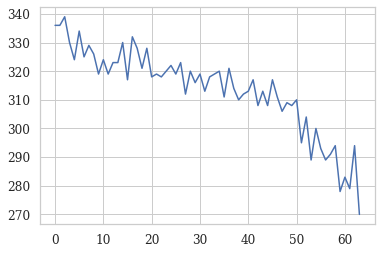

In [10]:
plt.plot(xs)
plt.show()

## Закономерности

1) Можно заметить, что данные отсортированы по параметру *Total score (1)*, так как по нему они строго не убывают; <br>
2) Остальные признаки тоже в среднем убывают и заметно скорелированы с *Total score (1)*;<br>
3) Отрицательный коэффициент асимметрии сигнализирует о небольшой "скошенности данных" влево, что заметно и по графику  для *Total score (1)*;<br>
4) Судя по первым строчкам данных, *Total score (1)* = *1st Half* + *2nd Half*.

Проверим все эти факты 2) и 4):

In [11]:
print('Corrcoefs (with Total score (1)):')
print('   With Total score (2):', np.corrcoef(df['Total score (1)'], df['Total score (2)'])[0,1])
print('   With 1st Half:', np.corrcoef(df['Total score (1)'], df['1st Half'])[0,1])
print('   With 2nd Half:', np.corrcoef(df['Total score (1)'], df['2nd Half'])[0,1])

print()
print('1st Half and 2nd Half are also stringly correlated:', np.corrcoef(df['1st Half'], df['2nd Half'])[0,1])

print()
print('Is "Total score (1)" = "1st Half" + "2nd Half?":', end=' ')
print(np.all(df['Total score (1)'] == df['1st Half'] + df['2nd Half']))

Corrcoefs (with Total score (1)):
   With Total score (2): 0.4462992463436751
   With 1st Half: 0.9445394111535921
   With 2nd Half: 0.9471188615813776

1st Half and 2nd Half are also stringly correlated: 0.7892137490788753

Is "Total score (1)" = "1st Half" + "2nd Half?": True


# <первая проверка>

## Pairplot

Для лучшего визуального понимания корреляций и закономерностей построим pairplot.

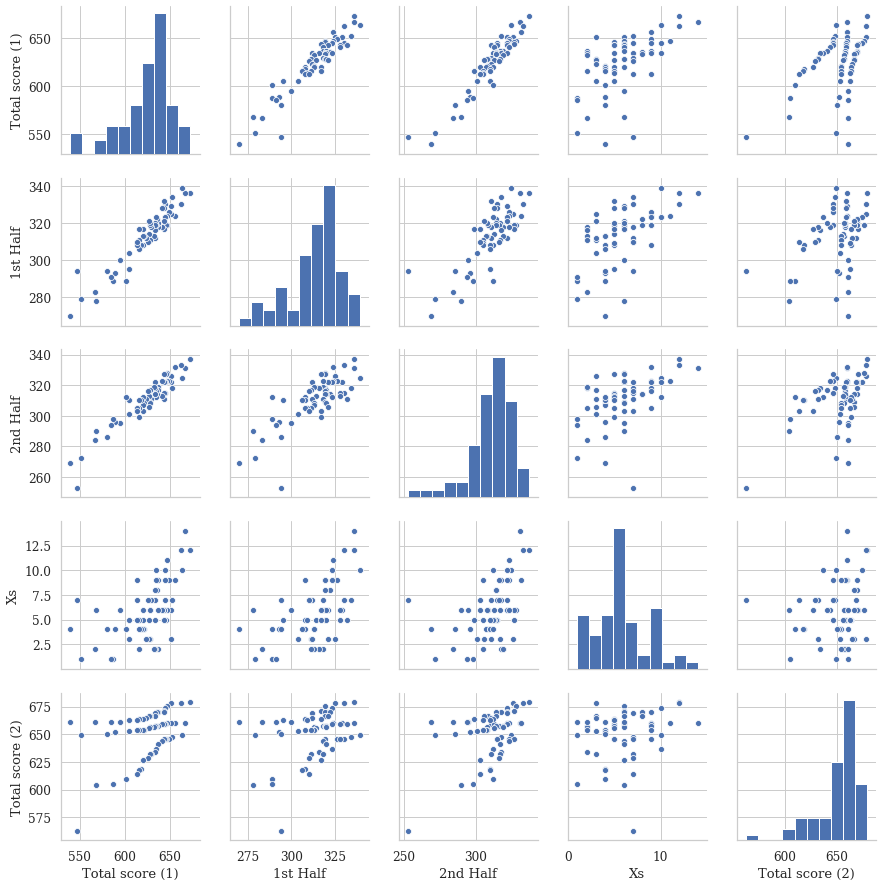

In [12]:
g = sns.pairplot(df)

Как мы и видели ранее, почти все признаки положительно коррелированы. 
В некоторых зависимости близка к линейной (Total Scroe (1), 1st Halft, 2nd Half). 
А в некоторых разброс точек немного выше (Xs, Total Score (2)). 
Что логично, ведь размер наконечника стрелы менее сильно влияет на результат, чем количество очков в первом раунде :)

## Распределение по странам

In [13]:
df['country'] = df['Archer(Women)'].apply(lambda s: s.split('(')[1][:-1])
df

,Archer(Women),Total score (1),1st Half,2nd Half,Xs,Total score (2),country
0,Park Sung-Hyun (KOR),673,336,337,12,679,KOR
1,Yun Ok-Hee (KOR),667,336,331,14,660,KOR
2,Joo Hyun-Jung (KOR),664,339,325,10,649,KOR
3,Khatuna Narimanidze (GEO),663,330,333,12,678,GEO
4,Kwon Un Sil (PRK),656,324,332,9,660,PRK
...,...,...,...,...,...,...,...
59,Najmeh Abtin (IRI),568,278,290,6,604,IRI
60,Dorji Dema (BHU),567,283,284,2,661,BHU
61,Sigrid Romero (COL),551,279,272,1,649,COL
62,Albina Kamaletdinova (TJK),547,294,253,7,563,TJK


### Статистики для стран:

In [14]:
for country, df_country in df.groupby('country'):
    vs = df_country['Total score (1)']
    print(f'{country}: min={vs.min()}, Q1={np.percentile(vs, 25)}, median={vs.median()}, mean={vs.mean()} Q3={np.percentile(vs, 75)}, max={vs.max()}')

AUS: min=580, Q1=593.5, median=607.0, mean=607.0 Q3=620.5, max=634
BHU: min=567, Q1=567.0, median=567.0, mean=567.0 Q3=567.0, max=567
BLR: min=616, Q1=616.0, median=616.0, mean=616.0 Q3=616.0, max=616
CAN: min=628, Q1=628.0, median=628.0, mean=628.0 Q3=628.0, max=628
CHN: min=635, Q1=635.5, median=636.0, mean=638.6666666666666 Q3=640.5, max=645
COL: min=551, Q1=597.0, median=643.0, mean=613.6666666666666 Q3=645.0, max=647
CYP: min=589, Q1=589.0, median=589.0, mean=589.0 Q3=589.0, max=589
CZE: min=620, Q1=620.0, median=620.0, mean=620.0 Q3=620.0, max=620
DEN: min=605, Q1=605.0, median=605.0, mean=605.0 Q3=605.0, max=605
EGY: min=587, Q1=587.0, median=587.0, mean=587.0 Q3=587.0, max=587
FRA: min=626, Q1=629.0, median=632.0, mean=634.3333333333334 Q3=638.5, max=645
GBR: min=623, Q1=637.0, median=651.0, mean=641.6666666666666 Q3=651.0, max=651
GEO: min=643, Q1=648.0, median=653.0, mean=653.0 Q3=658.0, max=663
GER: min=629, Q1=629.0, median=629.0, mean=629.0 Q3=629.0, max=629
GRE: min=613, 

### График распределения по странам

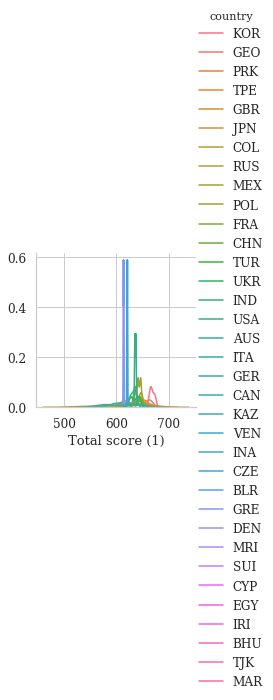

In [15]:
def distplot_fig(data, x, hue=None, row=None, col=None, legend=True, hist=False, **kwargs):
    bins = kwargs.pop('bins', None)
    if (bins is None) and hist: 
        # Make sure that the groups have equal-sized bins
        bins = np.histogram_bin_edges(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col)
    g.map(sns.distplot, x, bins=bins, hist=hist, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue) 
    return g   

distplot_fig(df, 'Total score (1)', 'country')
plt.rcParams['figure.dpi'] = 150
plt.show()